In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [2]:
pwd


'C:\\Users\\annap\\documents\\class\\ucb-sfc-fin-pt-08-2020-u-c'

In [3]:
whale_returns_csv = Path("~/documents/class/ucb-sfc-fin-pt-08-2020-u-c/ucb-sfc-fin-pt-08-2020-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/whale_returns.csv")
df = pd.read_csv(whale_returns_csv, parse_dates=True, index_col='Date', infer_datetime_format=True)

In [4]:
df.isnull()
df.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [5]:
df = df.dropna().copy()
df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [6]:
pwd

'C:\\Users\\annap\\documents\\class\\ucb-sfc-fin-pt-08-2020-u-c'

In [7]:
algo_returns_csv = Path("~/documents/class/ucb-sfc-fin-pt-08-2020-u-c/ucb-sfc-fin-pt-08-2020-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/algo_returns.csv")
dfar = pd.read_csv(algo_returns_csv, parse_dates=True, index_col='Date', infer_datetime_format=True)

In [8]:
dfar.isnull()
dfar.isnull().mean() * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [9]:
dfar = dfar.dropna().copy()
dfar

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [10]:
dfar.isnull()
dfar.isnull().mean() * 100

Algo 1    0.0
Algo 2    0.0
dtype: float64

In [11]:
sp500_returns_csv = Path("~/documents/class/ucb-sfc-fin-pt-08-2020-u-c/ucb-sfc-fin-pt-08-2020-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/sp500_history.csv")
dfsp = pd.read_csv(sp500_returns_csv, parse_dates=True, index_col='Date', infer_datetime_format=True)

In [12]:
dfsp.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [13]:
dfsp.dtypes

Close    object
dtype: object

In [14]:
dfsp["Close"] = dfsp["Close"].str.replace("$", "")
dfsp["Close"]
dfsp["Close"] = dfsp["Close"].astype("float")

In [15]:
dfsp["Close"] = dfsp["Close"].astype("float")

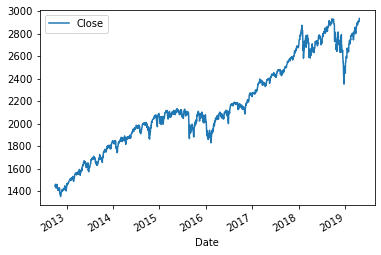

In [16]:
dfsp.plot()

In [17]:
daily_returns = dfsp.pct_change()
daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [18]:
dfsp.isnull()
dfsp.isnull().mean() * 100

Close    0.0
dtype: float64

In [19]:
dfsp = dfsp.dropna().copy()
dfsp

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [20]:
dfsp = dfsp.rename(columns={"Close" : "S&P 500"})
dfsp.head()

,S&P 500
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [21]:
joined_data_rows = pd.concat([df, dfar, dfsp], axis="columns", join="inner")
joined_data_rows

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2107.78
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,2907.06
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,2900.45
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,2905.03


In [22]:
jdr_dailyreturns = joined_data_rows.pct_change()
jdr_dailyreturns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.004389
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,0.001196
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-0.014174
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,0.003944


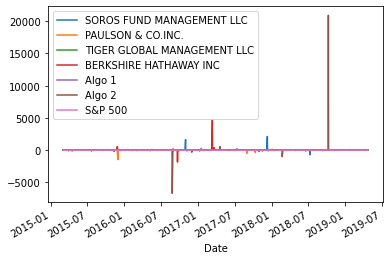

In [23]:
jdr_dailyreturns.plot()

In [24]:
#cumulative???

In [25]:
#plot

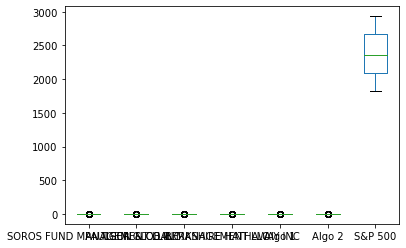

In [26]:
joined_data_rows.plot.box()

In [27]:
jdr_std = joined_data_rows.std()
jdr_std

SOROS FUND MANAGEMENT LLC        0.007895
PAULSON & CO.INC.                0.007023
TIGER GLOBAL MANAGEMENT LLC      0.010894
BERKSHIRE HATHAWAY INC           0.012919
Algo 1                           0.007620
Algo 2                           0.008342
S&P 500                        305.852115
dtype: float64

In [28]:

#Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
"""portfolio_a_std = np.random.normal(scale=0.5, size=10000)
portfolio_b_std = np.random.normal(scale=1.0, size=10000)
portfolio_c_std = np.random.normal(scale=1.5, size=10000)

portfolio_std = pd.DataFrame({
    "0.5": portfolio_a_std,
    "1.0": portfolio_b_std,
    "1.5": portfolio_c_std
})

portfolio_std.plot.hist(stacked=True, bins=100)"""

'portfolio_a_std = np.random.normal(scale=0.5, size=10000)\nportfolio_b_std = np.random.normal(scale=1.0, size=10000)\nportfolio_c_std = np.random.normal(scale=1.5, size=10000)\n\nportfolio_std = pd.DataFrame({\n    "0.5": portfolio_a_std,\n    "1.0": portfolio_b_std,\n    "1.5": portfolio_c_std\n})\n\nportfolio_std.plot.hist(stacked=True, bins=100)'

In [31]:
jdr_std_annual = jdr_std * np.sqrt(252)
jdr_std_annual

SOROS FUND MANAGEMENT LLC         0.125335
PAULSON & CO.INC.                 0.111488
TIGER GLOBAL MANAGEMENT LLC       0.172936
BERKSHIRE HATHAWAY INC            0.205077
Algo 1                            0.120967
Algo 2                            0.132430
S&P 500                        4855.251803
dtype: float64